# Расчет расстояний до объектов
## звезды типа RR Lyr $-$ стандартные свечи

<a href="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2018/03/ngc3201-rrlyrae.gif?zoom=2&resize=740%2C416"><img src="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2018/03/ngc3201-rrlyrae.gif?zoom=2&resize=740%2C416" width="85%" /></a> 

*На картинке несколько кадров, заметны переменные звёзды*

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Inverse_square_law.svg/2560px-Inverse_square_law.svg.png" width="50%" />

*Закон обратных квадратов*

\begin{equation*}
L=\sigma{T^4}(4\pi{R^2})\>[\mathbf{W}]
\end{equation*}

Данные о температуре обычно получают, пользуясь законом смещения Вина:

\begin{equation*}
\lambda_{peak}\cdot{T}=constant\>[\mathbf{m\cdot{K}}]
\end{equation*}

Текущая задача: определить расстояние до шарового скопления NGC 3201, пользуясь стандартными свечами.

<img src="https://i0.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/07/ngc-3201.jpg" width="75%" />

Для нашего исследования возьмём одну из звезд типа RR Lyr: [NGC 3201 2216](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Cl*+NGC+3201+++++LS+++++358&NbIdent=1).
Также нам нужен калибровочный источник, находящийся близко к интересующей нас звезде и попадающий в поле зрения инструментов. Возьмём [эту](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Cl*+NGC+3201+++CWFD++3-106&NbIdent=1) звезду.
Обратите внимание, что в этой области нет иных ярких источников, а почти все звёзды являются частью скопления.
<a href="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/08/rr-lryae-zoom.gif"><img src="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/08/rr-lryae-zoom.gif" width="75%" /></a>
<a href="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/08/field_zoomed.png">
<img src="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/08/field_zoomed.png" width="75%" /></a>

Данные получены с помощью [Aladin Sky Atlas](https://aladin.u-strasbg.fr/).

На кадре видны следующие объекты:<br>
<img src="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/08/sources_zoomed.png" width="75%" />
* inCl* - источник - звезда, часть скопления.
* BlueStraggler - голубой страгглер: на [английском](http://astronomy.swin.edu.au/cosmos/b/blue+stragglers), на [русском](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BB%D1%83%D0%B1%D1%8B%D0%B5_%D1%81%D1%82%D1%80%D0%B0%D0%B3%D0%B3%D0%BB%D0%B5%D1%80%D1%8B).
* RGB* - звезды, покинувшие главную последовательность и ушедшие на [ветвь красных гигантов](http://astronomy.swin.edu.au/cosmos/H/Horizontal+Branch+stars) на ГР диаграмме.
* RRLyr - переменные звезды, похожие на [RR Lyr](http://astronomy.swin.edu.au/cosmos/R/RR+Lyrae) с периодом меньше суток и известной звездной величиной.
* Star - звезды, не являющиеся частью скопления (возможно).
* X - источники жесткого излучения: пульсары (нейтронные звезды) или черные дыры.

Далее - часть, в которой неиронично надо что-то делать(

In [3]:
# Установка немного кривого пакета, который я нашел случайно
# Его использует и обслуживает какая-то группа, https://github.com/kbarbary/sep
# ! - знак для запуска команд терминала прямо в ноутбуке
!pip install sep
#!pip install numpy
#!pip install matplotlib
#!pip install astropy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Импорт всего, что потребуется
import numpy as np
import sep
import math
# Штуки для работы с файлами .fits, распространённый формат для хранения графической астроинформации
from astropy.utils.data import download_file
from astropy.io import fits

import matplotlib.pyplot as plt
from matplotlib import rcParams
# % - специфические команды для jupyter. Colab просто игнорирует, в других случаях может что-нибудь сломать, но вы быстро об этом узнаете
%matplotlib inline
# Определение размера картинок
rcParams['figure.figsize'] = [8., 8.]

In [28]:
# Значение звездной величины для Cl* NGC 3201 CWFD 3-106, наша калибровочная звезда
# http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Cl*+NGC+3201+CWFD+3-106
m_calibration = 14.81
# Значение абсолютной звездной величины для Cl* NGC 3201 LS 358, наша стандартная свеча, на основе некоторой статьи
# https://iopscience.iop.org/article/10.1086/344948
M_target = 0.58

Для определения расстояния до звезды (а значит, и до скопления) нужно вычислить видимую звёздную величину. Это наиболее трудоемкая подзадача.

In [5]:
"""
    Функция для определения расстояния до объекта из абсолютной и видимой звездной величины
"""
def distance_modulus(m,M):
    return 10**(0.2*(m-M))*10

In [6]:
"""
    Проверим функцию на данных о Солнце:
    m = -26.76 , M =4.81
    Результат переведён в а.е., должно получиться что-то около 1
"""
print(distance_modulus(-26.76,4.81)*648000/math.pi)

1.0009793845988386


In [9]:
"""
    Функция для получения звездной величины из потока,
    информация о котором поступает от инструмента
    Подробнее о переводе величин:
    http://classic.sdss.org/dr7/algorithms/fluxcal.html
"""
def app_mag(flux):
    return -2.5*math.log10(flux/(25.11*10**8))

In [8]:
"""
    Проверка функции конвертации, на основе данных о калибровочной звезде
    https://iopscience.iop.org/article/10.1086/344948
    Должно получиться 14.81
"""
print(app_mag(2967.8))

14.81853020554703


Далее некоторые технические функции для работы с данными

In [34]:
"""
    Функция для отражения картинки по осям. Одно из изображений,
    которые мы будем использовать, перевернуто
"""
def mirror_data(data):
    dataout = np.array(data)
    rows = len(data)
    cols = len(data[0])
    for r in range(rows):
        for c in range(cols):
            dataout[rows-1-r][cols-1-c] = data[r][c]
    return dataout

In [10]:
"""
    Получение данных из файла в формате .fits
"""
def get_image_data(filename, mirror=False):

    file = filename
    image_file = download_file(file, cache=True )

    data = fits.getdata(image_file)
    
    if mirror==True:
        data = mirror_data(data)
    
    # Эта штука нужна, чтобы с нашими данными мог работать пакет sep
    # https://sep.readthedocs.io/en/v1.0.x/tutorial.html#Finally-a-brief-word-on-byte-order
    data = data.byteswap().newbyteorder()
    
    return data

In [12]:
"""
    Эта функция будет вычитать из сырой картинки фон
"""
def subtract_background(data):
    # Вычисление пространственной вариации фона на картинке
    bkg = sep.Background(data)
    
    # Создание массива для фона
    bkg_image = bkg.back()
    # bkg_image = np.array(bkg) # то же самое, но через numpy
    
    # оценка величины фона, вычитание
    bkg_rms = bkg.rms()
    data_sub = data - bkg
    
    return data_sub, bkg

Работа со слабыми объектами осложняется шумом, он замыливает детали, ухудшает точность. Пакет sep позволяет решить эту проблему и повысить информативность данных.

In [14]:
# Скачивание и подготовка данных
data = get_image_data('http://jimmynewland.com/astronomy/ngc-3201/ngc3201_1.fits')
# Разделение на фон и очищенный сигнал
data_sub, bkg = subtract_background(data)
bkg_image = bkg.back()

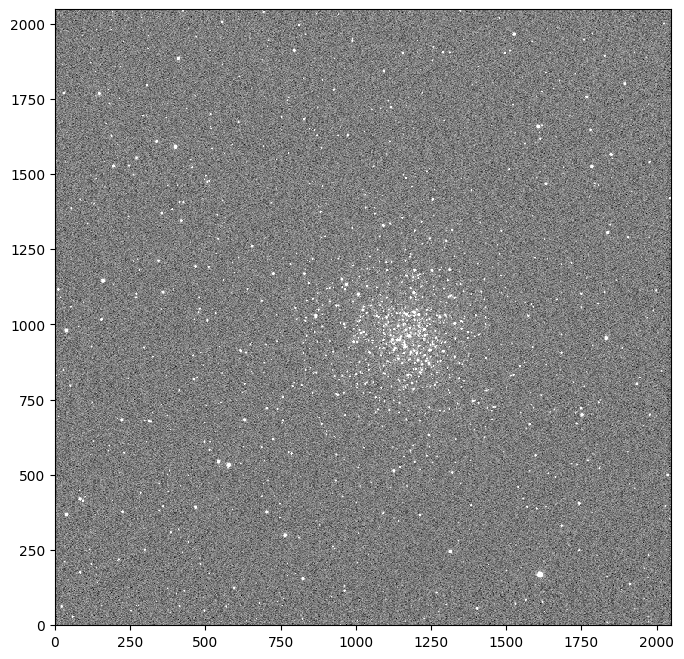

In [17]:
# Рисование и нормировка, нечищенные данные
m1, s1 = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray',vmin=m1-s1, vmax=m1+s1, origin='lower')

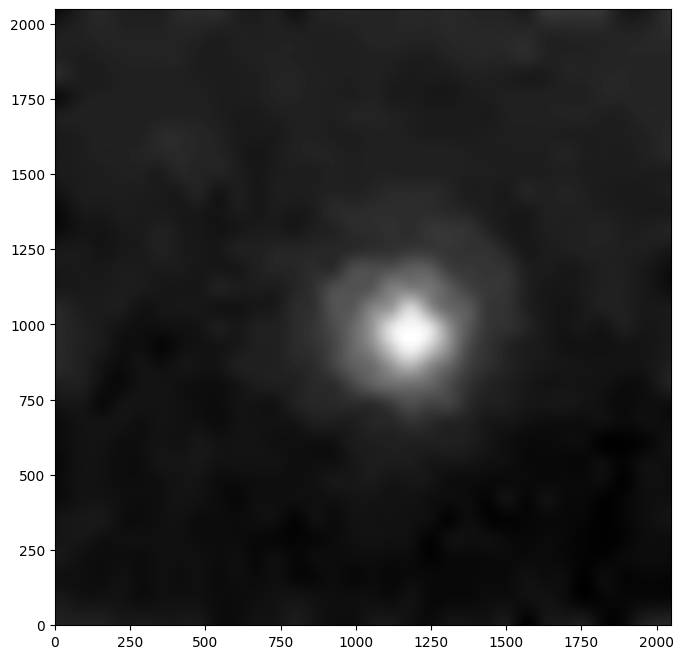

In [18]:
# Рисование, фон
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')

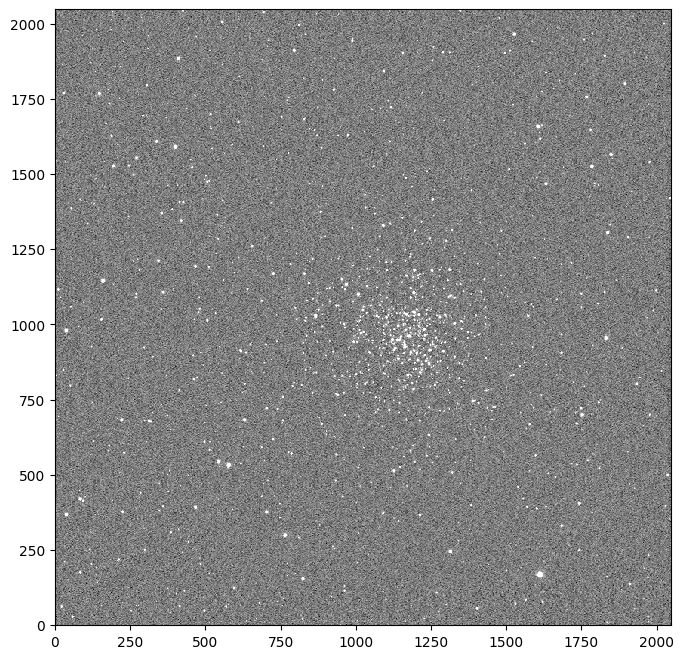

In [19]:
# Рисование очищенных данных
m2, s2 = np.mean(data_sub), np.std(data_sub)
plt.imshow(data_sub, interpolation='nearest', cmap='gray',vmin=m2-s2, vmax=m2+s2, origin='lower')

In [20]:
"""
    Эта функция принимает в себя чистые данные, фон, а также координаты
    области, где находится интересующая нас звезда.
    Функция нарисует эллипсы вокруг всех найденных источников в области и выдаст
    список всех выделенных источников
"""
def extract_sources(data_sub, bkg, x1, y1, x2, y2):
    # поиск штук
    objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
    
    from matplotlib.patches import Ellipse

    # рисование чистых данных
    fig, ax = plt.subplots()
    m, s = np.mean(data_sub), np.std(data_sub)
    im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)

    # Рисование эллипсов
    for i in range(len(objects)):
        e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
        e.set_facecolor('none')
        e.set_edgecolor('red')
        ax.add_artist(e)
    plt.show()
    
    return objects

In [21]:
"""
    Эта функция помогает найти координаты целевой звезды:
    будем искать ближайший к центру области источник.
    Функция возвращает координаты центра прямоугольника с заданными координатами
"""
def select_target(x1, y1, x2, y2):

    cen_x = x1 + (x2-x1)/2
    cen_y = y1 + (y2-y1)/2
    
    return cen_x, cen_y

In [22]:
"""
    Эта функция суммирует поток по круглой области на картинке
    Технически - просто сумма пикселей
"""
def sum_circle(arr, cx, cy, r):
    x, y = np.meshgrid(np.arange(arr.shape[1]), np.arange(arr.shape[0]))
    
    dist = np.linalg.norm(np.stack([x-cx, y-cy], axis=2), axis=2)
    mask = dist <= r

    return np.sum(arr[mask])

In [23]:
"""
    Функция потребляет список найденных источников, чистые данные, фон и координаты центра
    
    Далее вычисляется поток от ближайшего к центру источника
"""
def get_target_flux(objects, data_sub, bkg, cen_x, cen_y):
    target_flux = 0
    
    for i in range(len(objects)):
        curr_x = objects[i]['x']
        curr_y = objects[i]['y']
        
        if curr_x > cen_x-5 and curr_x < cen_x+5 and curr_y > cen_y-5 and curr_y < cen_y+5:
            print(data_sub)
            flux = sum_circle(data_sub, objects[i]['x'], objects[i]['y'],3.0)
            target_flux = round(int(flux))
    return target_flux

In [24]:
"""
    Функция находит в списке источников калибровочный источник и вычисляет поток от него
"""
def get_calib_flux(objects, data_sub, bkg, cen_x, cen_y):
    for i in range(len(objects)):
        curr_x = objects[i]['x']
        curr_y = objects[i]['y']
            
        if curr_x > cen_x-5 and curr_x < cen_x+5 and curr_y > cen_y-81-15 and curr_y < cen_y-81+15:
            flux = sum_circle(data_sub, objects[i]['x'], objects[i]['y'],3.0)
            calibration_flux = round(int(flux))
    return calibration_flux

In [25]:
"""
"""
def process_image(filename, x1=0, y1=0, x2=2048, y2=2048, mirror=False):
    # Получение данных
    data = get_image_data(filename, mirror)
    
    # Получение фона
    data_sub, bkg = subtract_background(data)
    
    # Поиск источников
    objects = extract_sources(data_sub, bkg, x1, y1, x2, y2)
    
    # Нахождение центра кадра
    cen_x, cen_y = select_target(x1, y1, x2, y2)
    
    # Нахождение потока от целевого источника
    target_flux = get_target_flux(objects, data_sub, bkg, cen_x, cen_y)
    
    # Нахождение потока от калибровочного источника
    calibration_flux = get_calib_flux(objects, data_sub, bkg, cen_x, cen_y)
    
    # Преобразование потока в звездные величины
    m_cal_ap = app_mag(calibration_flux)
    
    # Нормировка значений для калибровочного источника
    f_cal = m_cal_ap/m_calibration # Калибровочное соотношение
    m_cal = m_cal_ap/f_cal 
    
    # Преобразование потока целевого источника в абсолютною звездную величину
    m_tar_ap = app_mag(target_flux)
    
    # Калибровка яркости целевого источника
    m_tar = m_tar_ap/f_cal
        
    print("App. mag of target star m = : "+str(m_tar))
    print("App. mag of calib. star m = : "+str(m_cal))
    
    # Return the magnitude for the distance calculation
    return m_tar

In [26]:
# Список для значений звездной величины целевого источника
target_mags = []

Данные для работы process_image:<br>
filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_1.fits'
    x1=860
    x2=1060
    y1=668
    y2=868
filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_2.fits'
    x1=869
    x2=1069
    y1=673
    y2=873
filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_3.fits'
    x1=205
    x2=435
    y1=190
    y2=420
filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_4.fits'
    x1=262
    x2=462
    y1=195
    y2=395
filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_5.fits'
    x1=641
    x2=841
    y1=709
    y2=909
    mirror=True

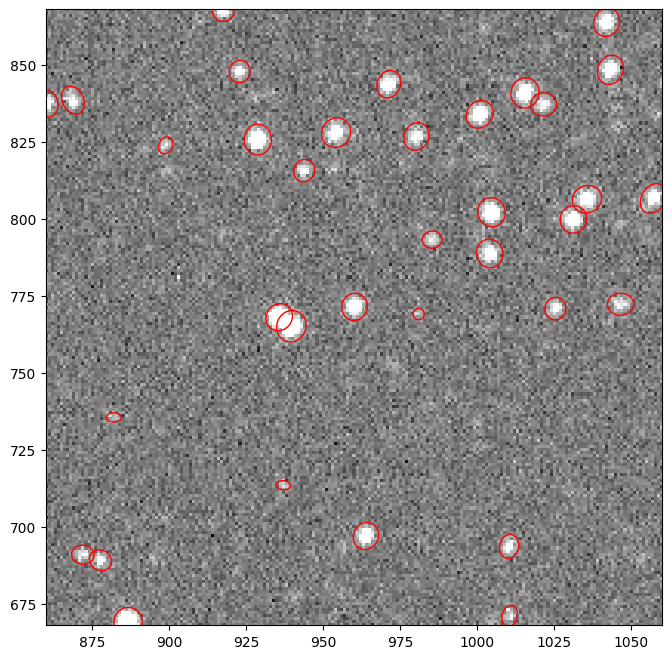

[[ 30.349186     8.552149   -21.73447    ... -25.542183    -0.94720745
   41.65499   ]
 [  9.986973   -10.471416   -27.161133   ...   4.905155   -12.922122
   10.759449  ]
 [  8.5008     -18.603743     7.4403877  ... -18.83574     10.737999
    2.9366531 ]
 ...
 [  8.594991    -3.665854     5.22408    ...   8.842644    -8.170975
   -1.8508692 ]
 [  3.89194     -4.229811    -8.341031   ...  -2.6612177    6.8345404
   20.508202  ]
 [-28.132332    16.096684     2.3408422  ...  16.104755     0.93255615
   -5.595824  ]]
App. mag of target star m = : 14.687566301840324
App. mag of calib. star m = : 14.809999999999999


In [29]:
"""
    Run process_image using the following parameters:
    filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_1.fits'
    x1=860
    x2=1060
    y1=668
    y2=868
"""
m_out = process_image(filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_1.fits', x1=860,  y1=668, x2=1060, y2=868)
target_mags.append(m_out)

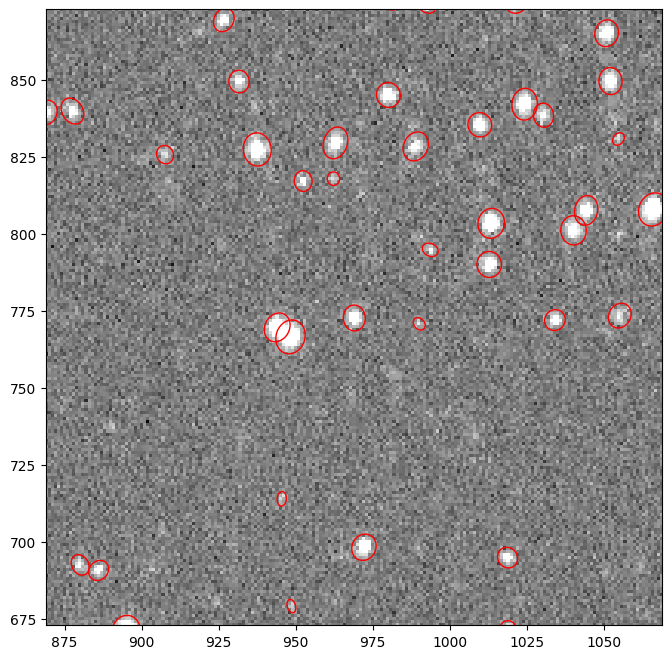

[[ 2.0264874e+01  2.4452648e+00  6.8572598e+00 ... -5.1070118e-01
  -1.5166439e+01  3.5627838e+01]
 [-5.6655354e+00  9.2446232e+00 -5.2635646e+00 ... -1.7941076e+01
  -5.2261353e-03  1.7861681e+00]
 [-8.3037615e+00  4.6122494e+00 -6.5656500e+00 ... -1.0085586e+01
   3.0501947e+00  3.1796791e+01]
 ...
 [ 6.1864433e+00  1.6719189e+01 -5.3685899e+00 ... -1.2991000e+01
   1.3121574e+01 -3.1343163e+01]
 [ 4.2760944e-01 -1.0716792e+01 -1.2773137e+01 ... -1.0051918e+01
   1.0718166e+01 -3.3423065e+01]
 [ 2.7011213e+00 -4.9524681e+01 -9.3442650e+00 ...  9.7760143e+00
  -1.3136902e+00 -2.8685801e+01]]
App. mag of target star m = : 15.139646265777834
App. mag of calib. star m = : 14.81


In [30]:
"""
    Run process_image using the following parameters:
    filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_2.fits'
    x1=869
    x2=1069
    y1=673
    y2=873
"""
m_out = process_image(filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_2.fits', x1=869, y1=673, x2=1069, y2=873)
target_mags.append(m_out)

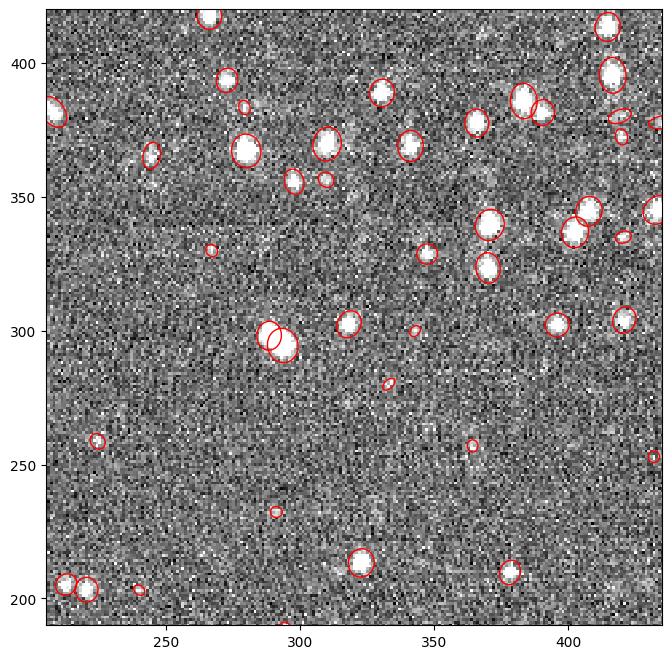

[[-1.62074337e+01  7.19910479e+00 -1.08561172e+01 ... -6.55384541e+00
   6.07930660e-01 -6.78273773e+00]
 [-2.41922569e+00 -1.91247730e+01  2.55737209e+00 ...  1.21145248e-02
   7.72989273e+00  1.18394480e+01]
 [-2.00144691e+01  1.46666565e+01  6.28493500e+00 ... -1.38016653e+00
  -7.48821831e+00  5.38696861e+00]
 ...
 [-8.21367264e+00  3.22218800e+00 -4.73048925e+00 ... -1.94669247e+00
  -4.29743385e+00 -2.16330290e+00]
 [-4.48302078e+00  6.71957493e+00 -1.89613152e+00 ... -4.61534882e+00
  -8.85325909e+00 -6.84227180e+00]
 [ 1.17426090e+01 -7.39106894e+00 -2.81509280e+00 ... -4.04062510e+00
  -1.27017670e+01 -1.86221600e-01]]
App. mag of target star m = : 15.449193409612876
App. mag of calib. star m = : 14.809999999999999


In [31]:
"""
    Run process_image using the following parameters:
    filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_3.fits'
    x1=205
    x2=435
    y1=190
    y2=420
"""
m_out = process_image(filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_3.fits', x1=205, y1=190, x2=435, y2=420)
target_mags.append(m_out)

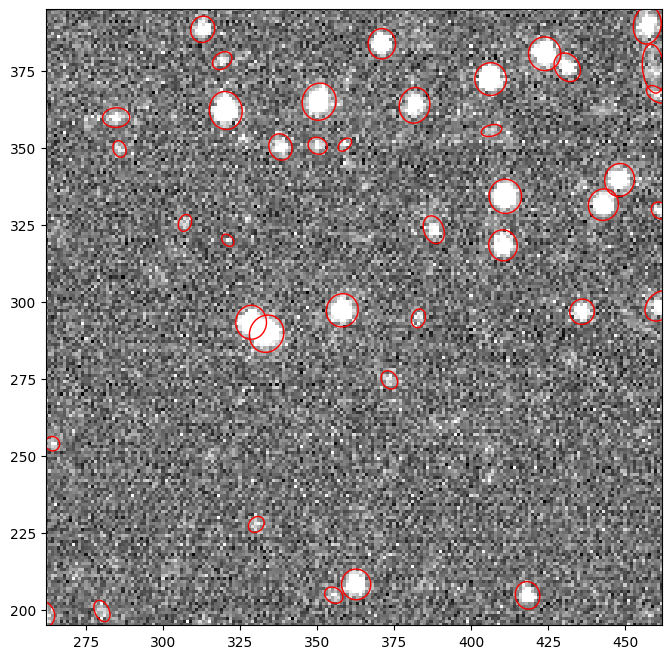

[[-11.170718     2.8158388   -0.61442953 ...  13.2997       5.5856256
   -0.7550908 ]
 [ -0.4939553  -14.078176     9.663514   ...   5.002157    -3.0292501
   -9.73562   ]
 [  8.947952    -8.291923    -3.1476152  ...  -8.021187    -9.921517
   12.473788  ]
 ...
 [  3.4969802    1.5889472   -7.381815   ...   9.256459     0.7150991
    5.9476805 ]
 [ -2.0341198    4.0641036   -7.605536   ... -12.01541      8.545071
   -2.865127  ]
 [ -4.2691274    0.20783389  -1.3583125  ...   4.089358     6.8291154
    5.8638606 ]]
App. mag of target star m = : 14.26576055738418
App. mag of calib. star m = : 14.81


In [32]:
"""
    Run process_image using the following parameters:
    filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_4.fits'
    x1=262
    x2=462
    y1=195
    y2=395
"""
m_out = process_image(filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_4.fits', x1=262, y1=195, x2=462, y2=395)
target_mags.append(m_out)

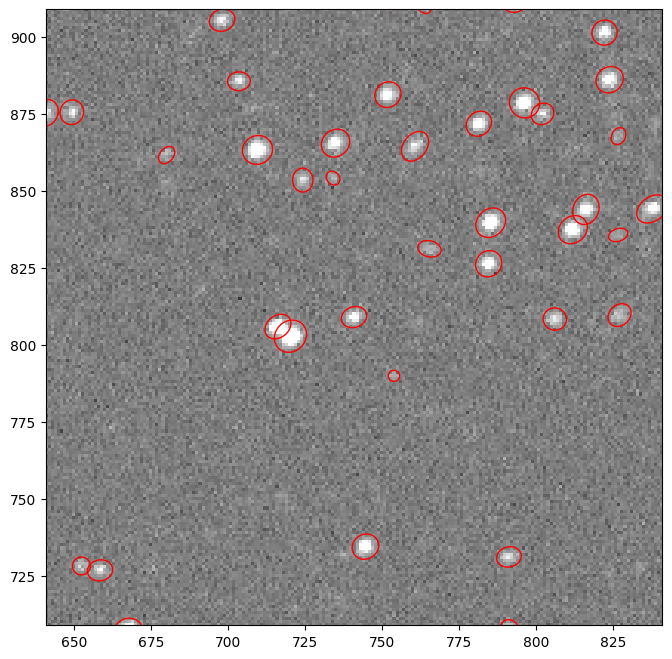

[[-13.868737    -7.44425      0.60408974 ...  11.667683   -16.766867
   -3.2055416 ]
 [ 14.397728     7.770832    -3.852356   ...   7.244522    11.21962
   -8.524666  ]
 [-36.209953     0.9176235  -15.940786   ...   9.313442   -29.523773
    1.4799557 ]
 ...
 [  4.7796154    4.10141     -4.03187    ... -17.591059    -8.724726
   -7.355318  ]
 [-17.989067     5.0995674   -8.93713    ...  -1.2140121  -14.607483
    7.2550106 ]
 [ 26.635588   -15.877466    -4.349661   ... -11.279383    -2.5341244
   36.785915  ]]
App. mag of target star m = : 15.403409221386482
App. mag of calib. star m = : 14.810000000000002


In [35]:
"""
NOTE: This image was taken by a different telescope in the network 
and subsequently was slightly different than the other 4 images.
Be sure to set mirror to True for this star.
    Run process_image using the following parameters:
    filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_5.fits'
    x1=641
    x2=841
    y1=709
    y2=909
    mirror=True
"""
m_out = process_image(filename='http://jimmynewland.com/astronomy/ngc-3201/ngc3201_5.fits', x1=641, y1=709, x2=841, y2=909, mirror=True)
target_mags.append(m_out)

In [37]:
# Смотрим на список звёздных величин целевого источника на каждом кадре
print(target_mags)

[14.687566301840324, 15.139646265777834, 15.449193409612876, 14.26576055738418, 15.403409221386482]


In [38]:
# Из всех значений имеет смысл выбрать самое яркое
brightest = np.min(target_mags)
# Учтем межзвездное поглощение, в направлении наших источников оно составляет 0.25 звездных величин
m_target = brightest-0.25
print(m_target)

14.01576055738418


In [40]:
distance = distance_modulus(m_target,M_target)/1000
print('Distance to NGC 3201: '+str(distance)+' kpc')

Distance to NGC 3201: 4.8657759946838715 kpc


Верное значение расстояния до NGC 3201 - 4.9 кпк.
Дополнительно можно ознакомиться с [этим](https://www.jimmynewland.com/wp/astro/measuring-rr-lyrae-stars-in-ngc-3201/) материалом, там еще и презентация есть.